<h1 align='center'> 영상처리 프로그래밍 실습 5</h1>

<h6 align='right'> 2022. 3. 31. </h6>

<div class="alert alert-block alert-info">
    
- 파일 이름에서 00000000을 자신의 학번으로, name을 자신의 이름으로 수정하세요.

- 다음 줄에 자신의 이름, 학번, 학과(전공)을 적으세요.

* 이름: 김성문   &nbsp;&nbsp;          학번: 20175115    &nbsp;&nbsp;         학과(전공): 빅데이터전공
    
</div>

- JupyterLab 문서의 최신 버전은 [JupyterLab Documentation](https://jupyterlab.readthedocs.io/en/stable/index.html#/)을  참고하라

- Markdown은 [Markdown Guide](https://www.markdownguide.org/)를 참고하라.
- [Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet/)

* 제출 마감: 4월 6일 (수) 오후 6:00까지 최종본을 SmartLEAD제출


In [2]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
print("OpenCV version", cv2.__version__)
print("NumPy version", np.__version__)

OpenCV version 4.5.2
NumPy version 1.20.3


## 지난 주 문제 1.


In [3]:
import numpy as np

def onMouse(event, x, y, flags, param):
    global pt1, pt2, clicked, img2, cropped_img
    if event == cv2.EVENT_LBUTTONDOWN and not clicked:
        clicked = True
        pt1 = [x, y]
    elif event == cv2.EVENT_MOUSEMOVE and clicked:
        pt2 = [x, y]
        img2 = img.copy()
        cv2.rectangle(img2, pt1, pt2, white, cv2.LINE_4)
        cv2.imshow("Image", img2)
    elif event == cv2.EVENT_LBUTTONUP and clicked:
        pt2 = [x, y]
        clicked = False
        if pt1 != pt2:
            cv2.rectangle(img2, pt1, pt2, white, cv2.LINE_4)
            cv2.imshow("Image", img2)
            if pt1[1] > pt2[1]:
                pt1[1], pt2[1] = pt2[1], pt1[1]
            if pt1[0] > pt2[0]:
                pt1[0], pt2[0] = pt2[0], pt1[0]
                
            cv2.imshow("Cropped", img[pt1[1]:pt2[1]+1,pt1[0]:pt2[0]+1,:])
        
white = (255, 255, 255)
clicked = False
img = cv2.imread("bird.png")
img2 = img.copy()
cropped_img = np.zeros_like(img)
cv2.namedWindow("Cropped", 0)
cv2.imshow("Cropped", cropped_img)
print(img.shape)
cv2.imshow("Image", img2)
#cv2.imshow("Cropped Image", img2)

cv2.setMouseCallback("Image", onMouse)
cv2.waitKey(0)
cv2.destroyAllWindows()

(425, 640, 3)


## 예제 1. 
2 차원 공간 상의 두 점의 좌표를 각각 $\mathbf{x}_1 = (x_1, y_1), \mathbf{x}_2 = (x_2, y_2)$라고 하자. 그러면 두 점 사이의 거리는 다음과 같다.

$$d(\mathbf{x}_1, \mathbf{x}_2) = \sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}$$

다음 두 점 사이의 거리를 구하라.

$\mathbf{x}_1 = (1, 4), \mathbf{x}_2 = (5, 7)$

In [4]:
p1 = np.array([1, 4])
p2 = np.array([5, 7])
distance = np.sqrt(((p1-p2)**2).sum())
print(distance)

5.0


## 예제 2.

'bird.png' 파일을 읽고 중앙에 영상의 정 중앙을 원의 중심으로 하고 영상의 높이의 1/3을 반지름으로 하는 원 외부의 영역을 모두 검은색으로 만드는 프로그램을 작성하라.

In [5]:
bird = cv2.imread('bird.png')
bird.dtype
bird.shape

(425, 640, 3)

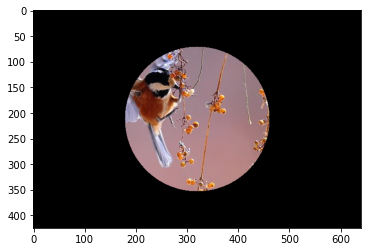

In [6]:
# x: down
# y: right
center = np.array([bird.shape[0]//2, bird.shape[1]//2])
radius = bird.shape[0]//3   # 영상 높이의 1/3

# broad casting 이용
x = np.arange(bird.shape[0]).reshape(bird.shape[0], 1)
y = np.arange(bird.shape[1]).reshape(1, bird.shape[1])

idx = (x-center[0])**2 + (y-center[1])**2 > radius ** 2    # 원 밖의 영역을 True
bird[idx] = [0, 0, 0]
plt.figure()
plt.imshow(bird[:,:,::-1])
plt.show()

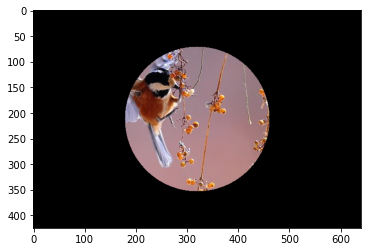

In [7]:
for x in range(bird.shape[0]):
    for y in range(bird.shape[1]):
        if (x - center[0])**2 + (y - center[1])**2 > radius**2:
            bird[x, y] = [0,0,0]
plt.figure()
plt.imshow(bird[:,:,::-1])
plt.show()

## 예제 3.

'bird.png' 파일을 읽고 네 가장자리 변의 중앙을 연결하는 마름로 외부의 영역을 모두 검은색으로 만드는 프로그램을 작성하라.

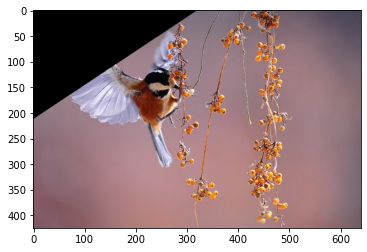

In [8]:
bird = cv2.imread('bird.png')

x = np.arange(bird.shape[0]).reshape(bird.shape[0], 1)
y = np.arange(bird.shape[1]).reshape(1, bird.shape[1])

A = np.array([0, bird.shape[1]//2])
B = np.array([bird.shape[0]//2, 0])
C = np.array([bird.shape[0]-1, bird.shape[1]//2])
D = np.array([bird.shape[0]//2, bird.shape[1]-1])

# AB 
slope_AB = (B-A)[1] / (B-A)[0]   # 기울기
idx_AB = y - A[1] < slope_AB * x   # 직선의 방정식에서 윗 부분을 True

bird[idx_AB] = (0,0,0)
plt.imshow(bird[:,:,::-1])
plt.show()

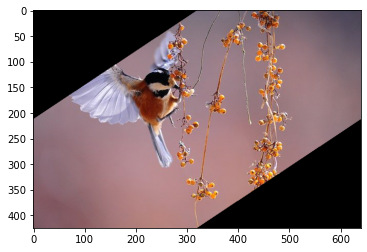

In [9]:
# CD
idx_CD = y - C[1] > slope_AB * (x-C[0])   # 직선의 방정식에서 아랫 부분을 True

bird[idx_CD] = (0,0,0)
plt.imshow(bird[:,:,::-1])
plt.show()

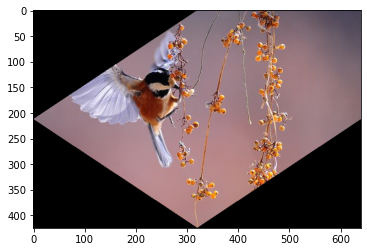

In [10]:
# BC
slope_BC = (C-B)[1] / (C-B)[0]
idx_BC = y < slope_BC*(x - B[0])   # 직선의 방정식에서 아랫 부분을 True

bird[idx_BC] = (0,0,0)
plt.imshow(bird[:,:,::-1])
plt.show()

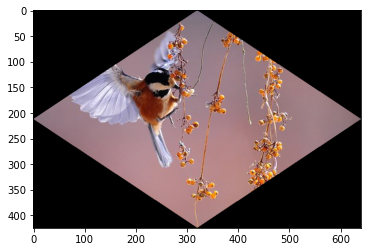

In [11]:
# AD
idx_AD = y - A[1] > slope_BC * x

bird[idx_AD] = (0,0,0)    # 직선의 방정식에서 윗 부분을 True
plt.imshow(bird[:,:,::-1])
plt.show()

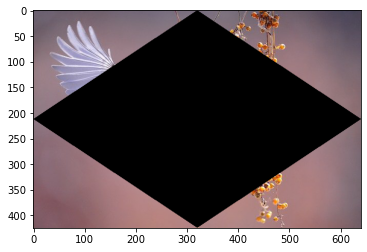

In [13]:
bird = cv2.imread('bird.png')

x = np.arange(bird.shape[0]).reshape(bird.shape[0], 1)
y = np.arange(bird.shape[1]).reshape(1, bird.shape[1])

A = np.array([0, bird.shape[1]//2])
B = np.array([bird.shape[0]//2, 0])
C = np.array([bird.shape[0]-1, bird.shape[1]//2])
D = np.array([bird.shape[0]//2, bird.shape[1]-1])

# AB 
slope_AB = (B-A)[1] / (B-A)[0]   # 기울기
idx_AB = y - A[1] > slope_AB * x   

# BC
slope_BC = (C-B)[1] / (C-B)[0]
idx_BC = y > slope_BC*(x - B[0])   

# CD
idx_CD = y - C[1] < slope_AB * (x-C[0])   

# AD
idx_AD = y - A[1] < slope_BC * x    

idx_out = idx_AB | idx_BC | idx_CD | idx_AD    # or연산으로 한 번에 묶음
idx_in = idx_AB & idx_BC & idx_CD & idx_AD

bird[idx_in] = (0,0,0)

plt.imshow(bird[:,:,::-1])
plt.show()

## 예제 4.
cv2.imread 함수를 이용해서 'bird.png' 파일을 읽고, cv2.circle 함수를 이용해서 영상의 정 중앙을 원의 중심으로 하고 영상의 높이의 1/3을 반지름으로 하는 원을 그려라.

In [73]:
help(cv2.circle)

Help on built-in function circle:

circle(...)
    circle(img, center, radius, color[, thickness[, lineType[, shift]]]) -> img
    .   @brief Draws a circle.
    .   
    .   The function cv::circle draws a simple or filled circle with a given center and radius.
    .   @param img Image where the circle is drawn.
    .   @param center Center of the circle.
    .   @param radius Radius of the circle.
    .   @param color Circle color.
    .   @param thickness Thickness of the circle outline, if positive. Negative values, like #FILLED,
    .   mean that a filled circle is to be drawn.
    .   @param lineType Type of the circle boundary. See #LineTypes
    .   @param shift Number of fractional bits in the coordinates of the center and in the radius value.



In [9]:
white = (255, 255, 255)
img = cv2.imread("bird.png")
center = np.array([img.shape[1]//2, img.shape[0]//2])    # ovencv에서는 축의 방향이 반대
radius = img.shape[0]//3 
cv2.circle(img, center, radius, white, cv2.LINE_4)
cv2.imshow("Image", img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
help(cv2.circle)

## 예제 5.

다음 조건을 모두 만족하는 프로그램을 작성하라.

1. 'bird.png' 파일을 읽고, cv2.imshow 함수를 이용하여 "Image" title을 가진 윈도우에 영상을 표시한다.
2. cv2.namedWindow("Cropped", 0) 으로 윈도우를 만들고  검은색 영상을 표시한다.
3. "Image" 윈도우 위에 마우스 왼쪽 버튼을 눌렀을 때의 위치를 원의 중심으로 하고, 마우스 왼쪽 버튼을 누른 상태에서 마우스를 움직이면 그 위치가 원 둘레의 한 점이 되도록 원을 update 한다.
4. 왼쪽 마우스 버튼을 떼면 원이 확정된다.
5. "Cropped" title을 가진 윈도우에 원 내부의 영상을 표시한다.

In [10]:
import numpy as np

def get_distance(p1, p2):
    d = np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)
    d = np.round(d)   # 반올림 함수(실수)
    return int(d)   
    
def onMouse(event, x, y, flags, param):
    global pt1, pt2, clicked, img2, cropped_img
    if event == cv2.EVENT_LBUTTONDOWN and not clicked:
        clicked = True
        pt1 = [x, y]
    elif event == cv2.EVENT_MOUSEMOVE and clicked:
        pt2 = [x, y]
        img2 = img.copy()
        # radius를 구하고, img2에 pt1을 중심으로 하고, radius를 반지름으로 하는 원을 그린다
        radius = get_distance(pt1, pt2)
        cv2.circle(img2, pt1, radius, white, cv2.LINE_4)
        cv2.imshow("Image", img2)
    elif event == cv2.EVENT_LBUTTONUP and clicked:
        pt2 = [x, y]
        clicked = False
        if pt1 != pt2:
            radius = get_distance(pt1, pt2)
            # radius를 구하고, img2에 pt1을 중심으로 하고, radius를 반지름으로 하는 원을 그린다
            cv2.circle(img2, pt1, radius, white, cv2.LINE_4)
            cv2.imshow("Image", img2)
            
            # cropped image를 구하여 별도의 창에 표시한다.
            img_cropped = img[pt1[1]-radius:pt1[1]+radius+1, pt1[0]-radius:pt1[0]+radius+1, :].copy()
            # cropped image의 원 외부를 흰색으로 채운다.
            x = np.arange(img_cropped.shape[0]).reshape(img_cropped.shape[0], 1)
            y = np.arange(img_cropped.shape[1]).reshape(1, img_cropped.shape[1])
            c = [img_cropped.shape[0]//2, img_cropped.shape[0]//2]      # cropped image의 center
            idx = (x - c[1])**2 + (y - c[0])**2 > radius**2
            img_cropped[idx] = white
            cv2.imshow("Cropped", img_cropped)
            
            
white = (255, 255, 255)
clicked = False
img = cv2.imread("bird.png")
img2 = img.copy()
cropped_img = np.zeros_like(img)
cv2.namedWindow("Cropped", 0)
cv2.imshow("Cropped", cropped_img)
print(img.shape)
cv2.imshow("Image", img2)
#cv2.imshow("Cropped Image", img2)

cv2.setMouseCallback("Image", onMouse)
cv2.waitKey(0)
cv2.destroyAllWindows()

(425, 640, 3)


## 예제 6. OpenCV의 image resize

'clock_150.jpg' 파일을 읽고, 가로 방향으로 1.5배, 세로 방향으로 2.5배 확장한 영상을 표시하라.

In [7]:
clock_150 = cv2.imread('clock_150.jpg')

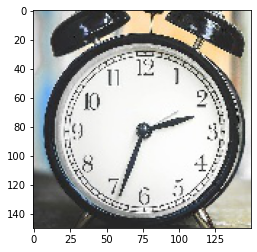

In [8]:
plt.imshow(clock_150[:,:,::-1])
plt.show()

In [108]:
option = None

(150, 150, 3)

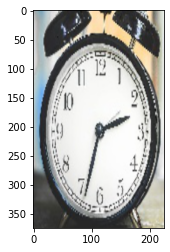

In [9]:
clock_1 = cv2.resize(clock_150, (225, 375), option)   # 직접 픽셀 입력
plt.imshow(clock_1[:,:,::-1])
plt.show()

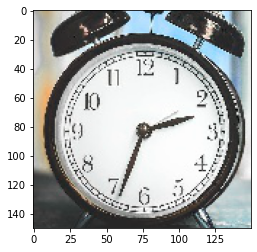

In [143]:
clock_2 = cv2.resize(clock_150, None, fx=1.5, fy=2.5)
plt.imshow(clock_2[:,:,::-1])

## 문제 1.

다음 조건을 모두 만족하는 프로그램을 작성하라.

- 'clock_150.jpg' 파일을 읽고, cv2.imshow 함수를 이용하여 "Clock" title을 가진 윈도우에 영상을 표시한다.
- "Clock" 윈도우 위에 마우스 오른쪽 버튼을 누르면 영상이 가로 세로 방향으로 조금씩 확대된다. 단, 최대 5 배 이상을 넘으면 더 이상 영상은 확대되지 않는다.
- "Clock" 윈도우 위에 마우스 왼쪽 버튼을 누르면 영상이 가로 세로 방향으로 조금씩 축소된다. 단, 원래 영상 크기보다 작아지면 안된다.
- 다음 숫자를 누르면 영상 확대 시 interpolation 옵션은 키보드의 숫자를 눌러서 지정한다.
  - 1: Nearest-neighbor interpolation
  - 2: Bilinear interpolation
  - 3: Cubic interpolation 


In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

print("OpenCV version", cv2.__version__)
print("NumPy version", np.__version__)

OpenCV version 4.5.2
NumPy version 1.20.3


In [11]:
def onMouse(event, x, y, flags, param):
    global option, fx, fy, img2
    if event == cv2.EVENT_LBUTTONUP:
        if fx * 0.7 < img.shape[0] or fy * 0.7 < img.shape[1]:     # 원영상보다 작아지면 축소하지 않는다.
            cv2.imshow("Clock", img2)
        else:
            fx = int(np.round(fx * 0.7))
            fy = int(np.round(fy * 0.7))
            img2 = cv2.resize(img2, (fx, fy))
            cv2.imshow("Clock", img2)
    
    elif event == cv2.EVENT_RBUTTONUP:    
        if fx * 1.3 > img.shape[0]*5 or fy * 1.3 > img.shape[1]*5:   # 원영상보다 5배 이상 커지면 더 이상 확대하지 않는다.
            cv2.imshow("Clock", img2)
        else:
            fx = int(np.round(fx * 1.3))
            fy = int(np.round(fy * 1.3))
            img2 = cv2.resize(img2, (fx, fy), option)
            cv2.imshow("Clock", img2)


img = cv2.imread('clock_150.jpg')
img2 = img.copy()

fx, fy, _ = img.shape   # x축과 y축 크기

option = None

cv2.imshow("Clock", img2)

cv2.setMouseCallback("Clock", onMouse)

while True:   
    num = cv2.waitKey()
    if num == ord('1'):
        option = cv2.INTER_NEAREST
    elif num == ord('2'):
        option = cv2.INTER_LINEAR
    elif num == ord('3'):
        option = cv2.INTER_CUBIC
    elif num == ord('q'):
        break
    else:
        option = None

cv2.destroyAllWindows()

In [114]:
x = np.random.randint(0, 5, 20)
x

array([2, 4, 0, 3, 4, 3, 2, 2, 1, 0, 2, 0, 4, 2, 4, 4, 0, 4, 4, 4])

In [115]:
type(x)

numpy.ndarray

In [116]:
x.shape

(20,)

In [117]:
x.dtype

dtype('int32')

In [118]:
x.min()

0

In [119]:
x.max()

4

In [120]:
values = range(x.min(), x.max()+1)
for n in values:
    print(n, np.count_nonzero(x == n))

0 4
1 1
2 5
3 2
4 8


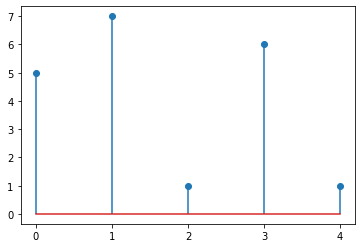

In [121]:
plt.stem(values, [5,7,1,6,1])
plt.xticks(values)
plt.show()

In [122]:
# Red component image
img_bird_jpg_mp_r = img_bird_jpg_mp[:,:,2]

NameError: name 'img_bird_jpg_mp' is not defined

In [ ]:
img_bird_jpg_mp_r

In [ ]:
img_bird_jpg_mp_r.shape

In [ ]:
values = np.arange(256)
hist_bird_jpg_mp_r = np.zeros(256)
for val in values:
    hist_bird_jpg_mp_r[val] = np.count_nonzero(img_bird_jpg_mp_r == val)
histogram_r

In [ ]:
plt.plot(hist_bird_jpg_mp_r)

In [ ]:
plt.stem(hist_bird_jpg_mp_r, markerfmt=" ")

In [ ]:
def get_histogram(img, vmin=0, vmax=255):
    x = np.arange(vmin, vmax+1)
    histogram = np.zeros(vmax-vmin+1)
    for pixel in x:
        histogram[pixel - vmin] = np.count_nonzero(img == pixel)
    return histogram

In [ ]:
img_bird_jpg_mp_r = img_bird_jpg_mp[:,:,0]
img_bird_jpg_mp_g = img_bird_jpg_mp[:,:,1]
img_bird_jpg_mp_b = img_bird_jpg_mp[:,:,2]

In [ ]:
hist_bird_jpg_mp_r = get_histogram(img_bird_jpg_mp_r)
hist_bird_jpg_mp_g = get_histogram(img_bird_jpg_mp_g)
hist_bird_jpg_mp_b = get_histogram(img_bird_jpg_mp_b)

In [ ]:
hist_bird_jpg_mp_g

In [ ]:
plt.figure(figsize=(12,4))
plt.bar(range(256), hist_bird_jpg_mp_r, alpha=0.5,  color='r')
plt.bar(range(256), hist_bird_jpg_mp_g, alpha=0.4,  color='g')
plt.bar(range(256), hist_bird_jpg_mp_b, alpha=0.3,  color='b')